In [6]:
import numpy as np

import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
from sklearn.datasets import make_blobs

In [8]:
x,y=make_blobs(n_samples=50, centers=2, random_state=0, cluster_std=0.8 )
y

array([1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0])

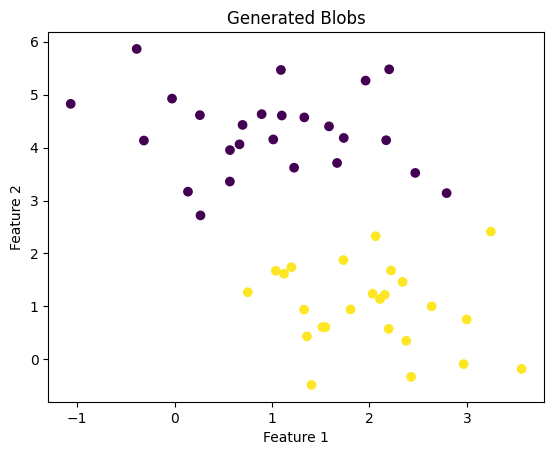

In [9]:
plt.scatter(x[:, 0], x[:, 1], c=y, cmap='viridis')
plt.title("Generated Blobs")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


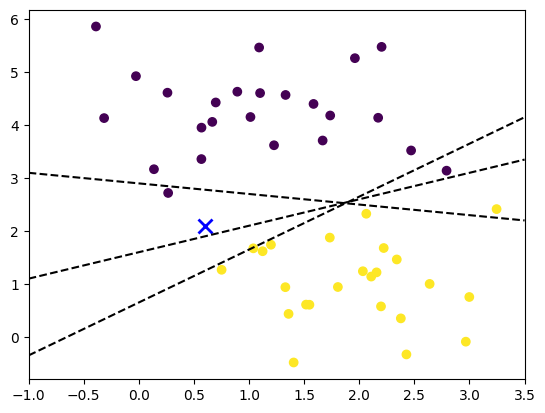

In [11]:
xfit=np.linspace(-1,3.5)
plt.scatter(x[:, 0], x[:, 1], c=y, cmap='viridis')
plt.plot([0.6],[2.1],'x', color='b',markeredgewidth=2, markersize=10)
for m , b in [(1,0.65),(0.5,1.6 ),(-0.2,2.9)]:
  plt.plot(xfit, m*xfit+b,'--k')
  plt.xlim(-1,3.5)

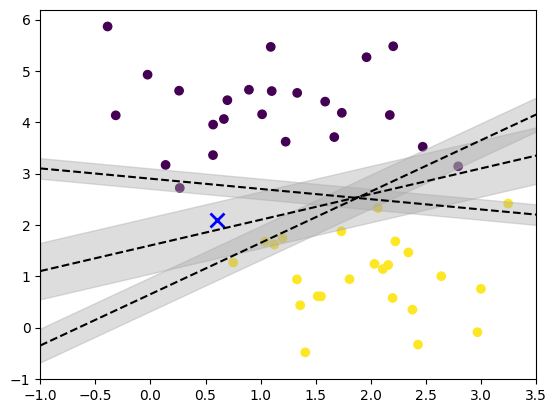

In [12]:
xfit=np.linspace(-1,3.5)
plt.scatter(x[:, 0], x[:, 1], c=y, cmap='viridis')
plt.plot([0.6],[2.1],'x', color='b',markeredgewidth=2, markersize=10)
for m , b  , d in [(1,0.65,0.33),(0.5,1.6,0.55 ),(-0.2,2.9,0.2)]:
  yfit=m*xfit+b
  plt.plot(xfit, yfit,'--k')
  plt.fill_between(xfit,yfit-d,yfit+d, edgecolor='none', color='#AAAAAA', alpha=0.4)
  plt.xlim(-1,3.5)

In [15]:
from sklearn.svm import SVC
model=SVC(kernel='linear', C=10)
model.fit(x,y)

SVC(C=10, kernel='linear')

In [16]:


def plot_svc_decision_function(model, ax=None, plot_support=True):
    """
    Plots the decision function for a 2D SVC classifier.

    Parameters:
    - model: a trained SVM model (e.g., sklearn.svm.SVC)
    - ax: a matplotlib axis to plot on (optional)
    - plot_support: whether to plot support vectors (default: True)
    """
    if ax is None:
        ax = plt.gca()

    # ایجاد شبکه‌ای از نقاط برای پیش‌بینی مدل
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T

    # محاسبه تابع تصمیم برای کل شبکه
    Z = model.decision_function(xy).reshape(XX.shape)

    # رسم خطوط contour برای decision boundary و margins
    ax.contour(XX, YY, Z,
               levels=[-1, 0, 1], linestyles=["--", "-", "--"], colors='k')

    # اگر True، بردارهای پشتیبان هم رسم می‌شن
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=100, linewidth=1, facecolors='none', edgecolors='k')

    ax.set_xlim(xlim)
    ax.set_ylim(ylim)


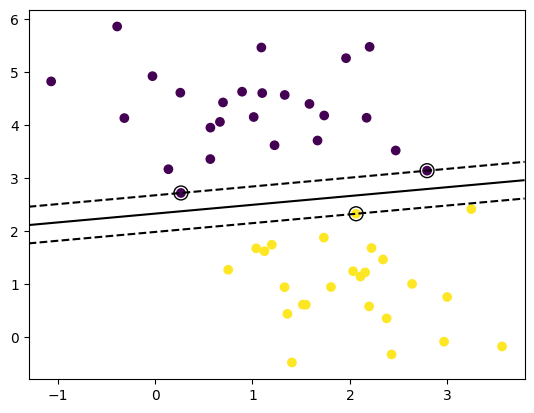

In [17]:
plt.scatter(x[:, 0], x[:, 1], c=y, cmap='viridis')
plot_svc_decision_function(model)

In [20]:
model.support_vectors_

array([[0.26604148, 2.71915015],
       [2.79207378, 3.14029479],
       [2.06366754, 2.32636006]])